<a href="https://colab.research.google.com/github/raamiiChu/NCCU_110-2_Applications-of-mathematics-softwares-homework/blob/main/0502_%E4%BD%9C%E6%A5%AD/gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FF3030>更改處皆以紅色字體標示在對應程式碼上方</font>

### 更改概要

1. 載入 re 模組
1. 將輸入的內容轉換成小寫
1. 去除標點符號

## 1. 讀入訓練好的 model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/數學軟體應用/作業/0502 作業/'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/數學軟體應用/作業/0502 作業


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets.imdb import get_word_index

In [ ]:
word_index = get_word_index()

model = load_model("imdb_model")

1654784/1641221 [==============================] - 0s 0us/step


## 2. 用 `gradio` 打造 web app!

### 下載 gradio 

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.9 MB 32.8 MB/s 
     |████████████████████████████████| 253 kB 60.0 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 212 kB 73.7 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 72.5 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 67.8 MB/s 
     |████████████████████████████████| 271 kB 13.5 MB/s 
     |████████████████████████████████| 94 kB 123 kB/s 
     |████████████████████████████████| 144 kB 68.6 MB/s 
     |████████████████████████████████| 10.9 MB 66.2 MB/s 
     |████████████████████████████████| 59 kB 8.8 MB/s 
     |████████████████████████████████| 79 kB 10.0 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 4.0 MB 45.5 MB/s 
     |████████████████████████████████| 856 kB 70.7 MB/s 
     |████████████████████

### 載入模組

In [ ]:
import gradio as gr

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<font color=#FF3030>載入 re 模組</font>

In [ ]:
import re  # 用於去除標點符號

#### 補充
re：正規表達式（Regular Expression）

[相關文章](https://chwang12341.medium.com/%E7%B5%A6%E8%87%AA%E5%B7%B1%E7%9A%84python%E5%B0%8F%E7%AD%86%E8%A8%98-%E5%BC%B7%E5%A4%A7%E7%9A%84%E6%95%B8%E6%93%9A%E8%99%95%E7%90%86%E5%B7%A5%E5%85%B7-%E6%AD%A3%E5%89%87%E8%A1%A8%E9%81%94%E5%BC%8F-regular-expression-regex%E8%A9%B3%E7%B4%B0%E6%95%99%E5%AD%B8-a5d20341a0b2)

##### 說明

raw string

In [ ]:
# raw string 與 一般字串 的比較
str1 = "\new line"
str2 = r"\new line"

print(str1)
print("="*10)
print(str2)  # 無視跳脫字元 \n


ew line
\new line


可以加上 [ ] 來存放多個字元，並搭配 re.sub 來去除字元

In [ ]:
test_pattern = r"[asdfghjkl]"  # 匹配任何在 [ ] 內的字元
re.sub(test_pattern, "", "abcdefghijklmnopqrstuvwxyz")  # (pattern, replace, string)

'bceimnopqrtuvwxyz'

##### 範例

In [ ]:
x = "1?2!3,4.5:6'7\"8[9{}]0"
pattern = r"[?!,.<>:;~#$%^&*(){}\[\]\'\"]"  # 匹配 ?!,.<>:;~#$%^&*(){}[]'" 等標點符號
re.sub(pattern, "", x)  # (pattern, replace, string)

'1234567890'

In [ ]:
text = "A? S! D\" F# G."
pattern = r"[?!,.<>:;~#$%^&*(){}\[\]\'\"]"

seq = []
for x in text.split():
    x = x.lower()  # 轉換成小寫
    x = re.sub(pattern, "", x)
    seq.append(x)
    
seq

['a', 's', 'd', 'f', 'g']

### 打造 web app

#### 補充
函数注解（Function Annotations）

[相關文章](https://mozillazg.com/2016/01/python-function-argument-type-check-base-on-function-annotations.html)

在定義函数的时候對 參數和回傳值 加上注解，用以方便他人觀看 \

`def text_filter(voc:str) -> str:` 

- `voc:str` 代表 參數 voc 的資料型態
- `-> str` 代表 回傳值 的資料型態

#### 程式碼

In [ ]:
pattern = r"[?!,.<>:;~#$%^&*(){}\[\]\'\"]"

- <font color=#FF3030>將輸入的內容轉換成小寫</font>
- <font color=#FF3030>去除標點符號</font>


In [ ]:
# 處理單字 
def text_filter(voc:str) -> str:
    voc = re.sub(pattern, "", voc.lower())  # 轉換成小寫後，去除標點符號
    if voc in word_index:  # 確認修改完的單字有在 imdb 的單字庫後再回傳，否則可能會因為有冷門單字的出現而發生錯誤
        return word_index[voc]

In [ ]:
def positive_or_negative(text:str) -> str:
    seq = [text_filter(voc) for voc in text.split()]  # 將單字逐一代入函式運行，並將結果放入陣列 seq
    score = model.predict([seq])[0][0]

    if score >= 0.5:
        return f"我有 {score*100:.2f}% 的信心認為這是正面評論"
    else:
        return f"我有 {(1-score)*100:.2f}% 的信心認為這是負面評論"

In [ ]:
iface = gr.Interface(fn=positive_or_negative, inputs="text", outputs="text")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://35565.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fae87993550>,
 'http://127.0.0.1:7866/',
 'https://35565.gradio.app')

#### 運行結果截圖

輸入：I love the camera movement and soundtrack of this movie. It allows me to immerse myself in the movie.
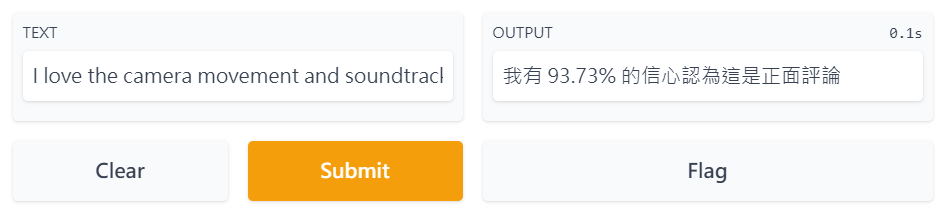

輸入：Could of been so much better if properly "cast directed" and a "better script".
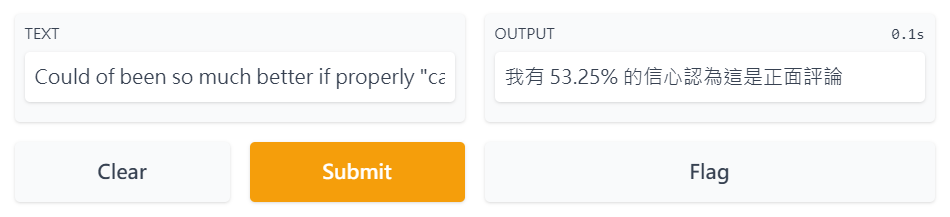

輸入：WHAT THE FUCK IS THIS GARBAGE! DO NOT WATCH THIS MOVIE UNLESS YOU ARE AN IDIOT!
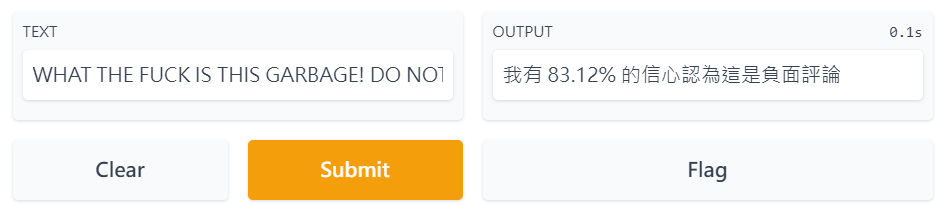